# Big mart Sales Data Predictive System Using Machine Learning

## Importing Libraries

In [204]:
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.metrics import accuracy_score # checking the accuracy score of predicted result
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load Dataset using pandas

In [205]:
bigmart_dataset = pd.read_csv('data/bigmart_sales_dataset.csv')

## Exploratory Data Analysis

In [206]:
# counting the rows and columns
bigmart_dataset.shape

(8523, 12)

In [207]:
bigmart_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [208]:
bigmart_dataset.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [209]:
# getting all the statistical information about the item outlet sales column.
bigmart_dataset['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

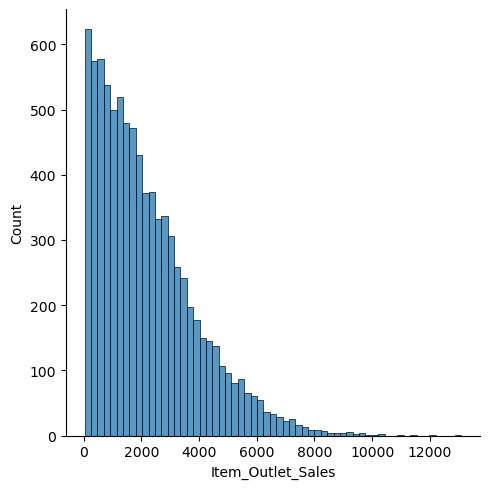

In [210]:
sns.displot(bigmart_dataset['Item_Outlet_Sales'])

1. Deviate from the normal distribution.
2. Have appreciable positive skewness.
3. Show peakedness.

In [211]:
print(f"Skewness: {bigmart_dataset['Item_Outlet_Sales'].skew()}")
print(f"Kurtsis: {bigmart_dataset['Item_Outlet_Sales'].kurt()}")

Skewness: 1.1775306028542796
Kurtsis: 1.6158766814287264


In [212]:
# data types checking 
bigmart_dataset.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [213]:
categorical_features = bigmart_dataset.select_dtypes(include=[object]) # taking all the fields contains object datatype
categorical_features.head(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2


In [214]:
numerical_features = bigmart_dataset.select_dtypes(include=[np.number])# taking all the fields contains numeric(int,float) datatypes
numerical_features.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228


In [215]:
# outlet establishment year count
bigmart_dataset['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [216]:
# how many unique values are there in our dataset.
bigmart_dataset.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

#### Lets start looking Outlet_Size, Outlet_Location_Type, and Outlet_Type distribution in Item_Outlet_Sale

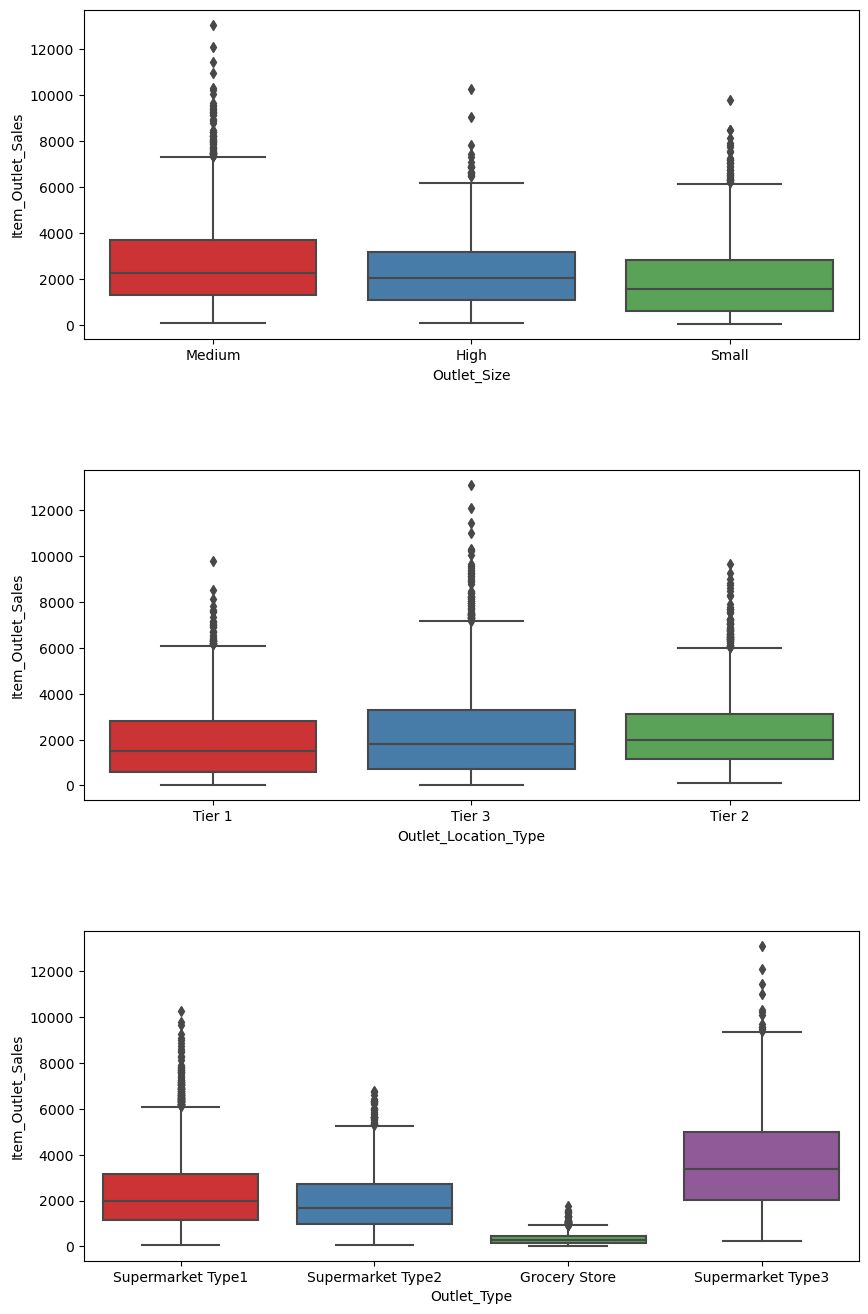

In [217]:
plt.figure(figsize=(10,9))

plt.subplot(311)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=bigmart_dataset,palette='Set1')

plt.subplot(312)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=bigmart_dataset, palette="Set1")

plt.subplot(313)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=bigmart_dataset, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

## Data Cleaning and Imputing Missing Values

In [218]:
# checking the dataset contains null values
bigmart_dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [219]:
item_avg_weight = bigmart_dataset.pivot_table(values='Item_Weight', index='Item_Identifier')
item_avg_weight.head()

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115


In [220]:
missing_values_item_weight = bigmart_dataset['Item_Weight'].isnull()
print(f'missing_values_item_weight : {sum(missing_values_item_weight)}')

missing_values_item_weight : 1463


/var/folders/2l/jkksn9096h725d4d5b24jssw0000gn/T/ipykernel_45864/2367571752.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bigmart_dataset.Item_Weight)


<AxesSubplot: xlabel='Item_Weight', ylabel='Density'>

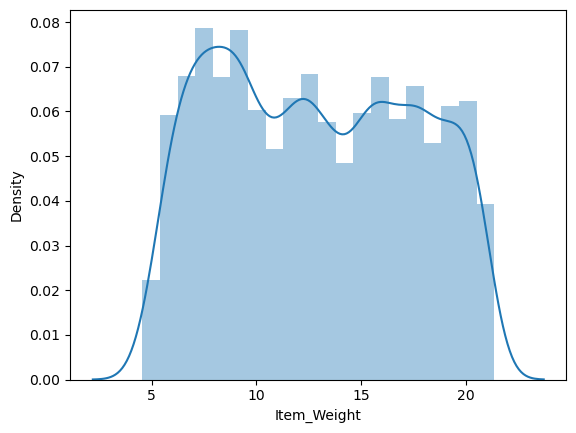

In [221]:
sns.distplot(bigmart_dataset.Item_Weight)

In [222]:
# taking care of missing data's using simple imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')# here it uses mean strategy to manage the missing fields in the dataset.
imputer.fit(bigmart_dataset.iloc[:, 1:2])
bigmart_dataset.iloc[:, 1:2] = imputer.transform(bigmart_dataset.iloc[:, 1:2])

In [223]:
bigmart_dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [224]:
#Impute data and check 
#missing values before and after imputation to confirm
missing_values_outlet_size = bigmart_dataset['Outlet_Size'].isnull()
print(f"before imputing the outlet size : {sum(missing_values_outlet_size)}")

before imputing the outlet size : 2410


In [225]:
#Import mode function:
from scipy.stats import mode

#Determine the mode for each
outlet_size_mode = bigmart_dataset.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x.astype('str')).mode[0]))
bigmart_dataset.loc[missing_values_outlet_size,'Outlet_Size'] = bigmart_dataset.loc[missing_values_outlet_size,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

/var/folders/2l/jkksn9096h725d4d5b24jssw0000gn/T/ipykernel_45864/2033838168.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  outlet_size_mode = bigmart_dataset.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x.astype('str')).mode[0]))
/Users/thanseef/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/stats/_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


In [226]:
print('Mode for each Outlet_Type:')
print(outlet_size_mode)

Mode for each Outlet_Type:
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size           nan             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [227]:
print(f"after the imputation : {sum(bigmart_dataset['Outlet_Size'].isnull())}")

after the imputation : 0


In [228]:
bigmart_dataset.isnull().sum() #final checkup

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64